In [ ]:
#Churn Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
df = pd.read_csv('/content/Churn_Analysis.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# changing datatype of TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #coerce will replace any value that cannot be converted to a number with NaN
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)

/tmp/ipython-input-16-2240354619.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
#Customer Lifetime Value
df['CLV'] = df['MonthlyCharges'] * df['tenure']
df.sort_values('CLV', ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CLV
6925,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,8550.0
7000,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,8510.4
6926,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,8481.6
6856,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No,8467.2
7029,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No,8460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0.0
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0.0
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0.0
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0.0


In [ ]:
#Gender-wise churn ratio
df.groupby('gender')['Churn'].value_counts()
total_No = 2625+2549
take_Yes = 939 + 930
total_male = df[df['gender'] == 'Male'].groupby('gender')['Churn'].value_counts()

total_female = df[df['gender']=='Female'].groupby('gender')['Churn'].value_counts()

print(total_male)
print(total_female)

gender  Churn
Male    No       2625
        Yes       930
Name: count, dtype: int64
gender  Churn
Female  No       2549
        Yes       939
Name: count, dtype: int64


In [ ]:
df['CLV'].sum()

np.float64(16055091.45)

Churn
No    73.463013
dtype: float64


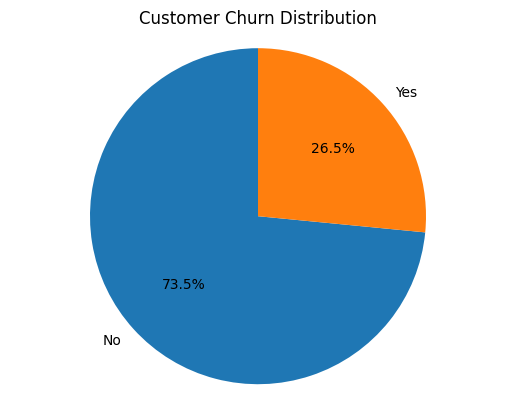

In [ ]:
# Ratio of retention
sub = df[df['Churn']=='No'].groupby('Churn').size()
#Total customers are 7043
Retention_Rate = (sub/7043)*100
print(Retention_Rate)
cust_churn = df.groupby('Churn').size()
plt.pie(cust_churn, labels=cust_churn.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.axis('equal')  # Makes it a perfect circle
plt.show()

In [ ]:
#count of Customer Churn for first three years
Fy = df[df['tenure'] <= 12].groupby('Churn').size()
Sy = df[df['tenure'] <= 24].groupby('Churn').size() -Fy
Ty = df[df['tenure'] <= 36].groupby('Churn').size() -Sy
Fory = df[df['tenure'] <= 48].groupby('Churn').size() -Ty
Fivey = df[df['tenure'] <= 60].groupby('Churn').size() -Fory
Sixy = df[df['tenure'] <= 72].groupby('Churn').size() -Fivey
print(Fy)
print(Sy)
print(Ty)

Churn
No     1149
Yes    1037
dtype: int64
Churn
No     730
Yes    294
dtype: int64
Churn
No     1801
Yes    1217
dtype: int64


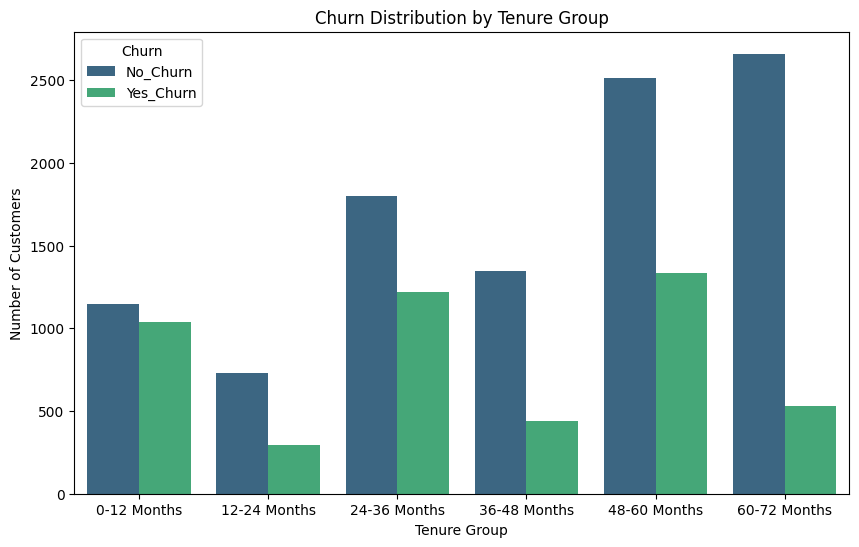

In [ ]:
#Visual representation of Year on Year Customer Churn
tenure_churn_data = pd.DataFrame({
    'Tenure_Group': ['0-12 Months', '12-24 Months', '24-36 Months','36-48 Months','48-60 Months','60-72 Months'],
    'No_Churn': [Fy['No'], Sy['No'], Ty['No'],Fory['No'],Fivey['No'],Sixy['No']],
    'Yes_Churn': [Fy['Yes'], Sy['Yes'], Ty['Yes'],Fory['Yes'],Fivey['Yes'],Sixy['Yes']]
})

tenure_churn_data_melted = tenure_churn_data.melt('Tenure_Group', var_name='Churn', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure_Group', y='Count', hue='Churn', data=tenure_churn_data_melted, palette='viridis')
plt.title('Churn Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
#Customer without InternetService
churn_internet = df[df['InternetService'] == 'No'].groupby('Churn').size()
seniority_internet = df[df['InternetService'] == 'No'].groupby('SeniorCitizen').size()
print(churn_internet)
print(seniority_internet)


Churn
No     1413
Yes     113
dtype: int64
SeniorCitizen
0    1474
1      52
dtype: int64


In [ ]:
#Senior Citizen
senior_churn = df[df['SeniorCitizen']==1].groupby('Churn').size()
print (f"senior churn is :{senior_churn}")
total_senior = 666+476
Retention_Rate_senior = (senior_churn/total_senior)*100
print(Retention_Rate_senior)
avg_chg_senior = df[df['SeniorCitizen']==1].groupby('Churn')['TotalCharges'].mean()
print(avg_chg_senior)

senior churn is :Churn
No     666
Yes    476
dtype: int64
Churn
No     58.318739
Yes    41.681261
dtype: float64
Churn
No     3494.213363
Yes    1853.792332
Name: TotalCharges, dtype: float64


In [ ]:
#Normal People
normal_churn = df[df['SeniorCitizen']==0].groupby('Churn').size()
print(f"Normal citizen :{normal_churn}")
total_normal = 4508 + 1393
Retention_Rate_normal = (normal_churn/total_normal)*100
print(Retention_Rate_normal)
avg_chg_normal = df[df['SeniorCitizen']==0].groupby('Churn')['TotalCharges'].mean()
print(avg_chg_normal)
#concludes that the churn rate are higher in senior citizen

Normal citizen :Churn
No     4508
Yes    1393
dtype: int64
Churn
No     76.393832
Yes    23.606168
dtype: float64
Churn
No     2416.298799
Yes    1421.767229
Name: TotalCharges, dtype: float64


       Non-Senior  Senior
Churn                    
No           4508     666
Yes          1393     476


<Axes: xlabel='Churn'>

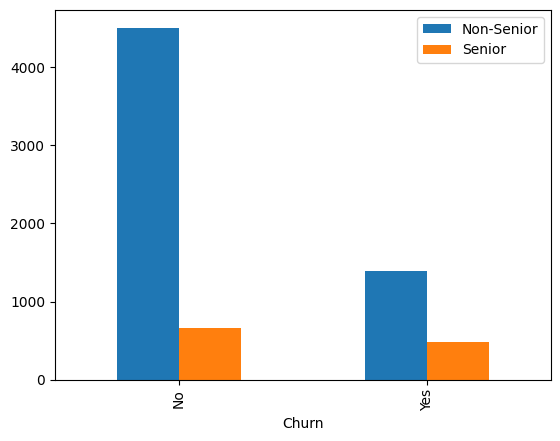

In [ ]:
churn_data = pd.DataFrame({
    'Non-Senior': normal_churn,
    'Senior': senior_churn
})
print(churn_data)
churn_data.plot(kind='bar')

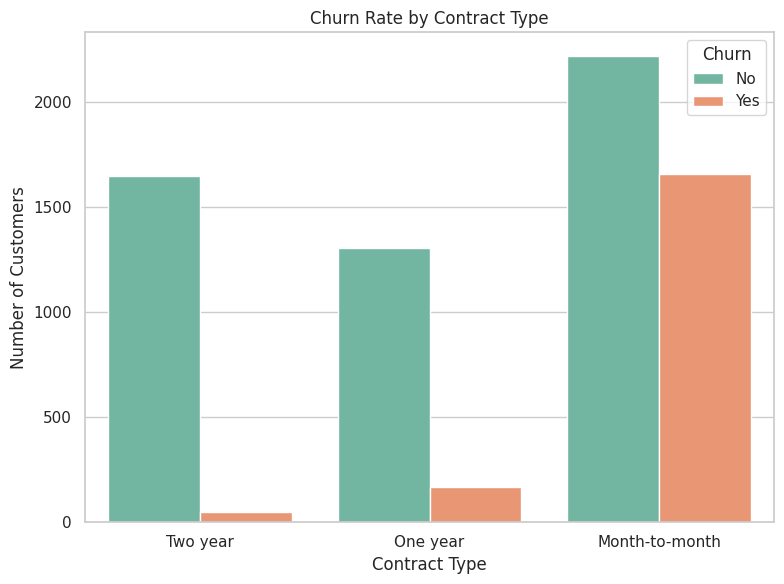

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot: Contract Type vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [ ]:
df['CLV'] = df['MonthlyCharges'] * df['tenure']
lost_revenue = df[df['Churn'] == 'Yes']['CLV'].sum()
print(f"Estimated Revenue Lost Due to Churn: ₹{lost_revenue:,.2f}")


Estimated Revenue Lost Due to Churn: ₹2,862,576.90


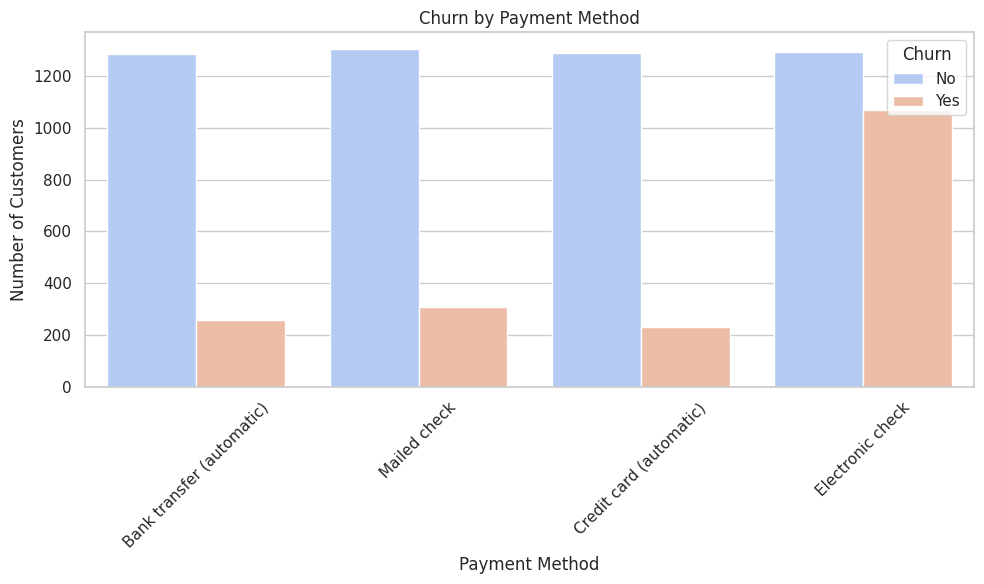

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='coolwarm')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

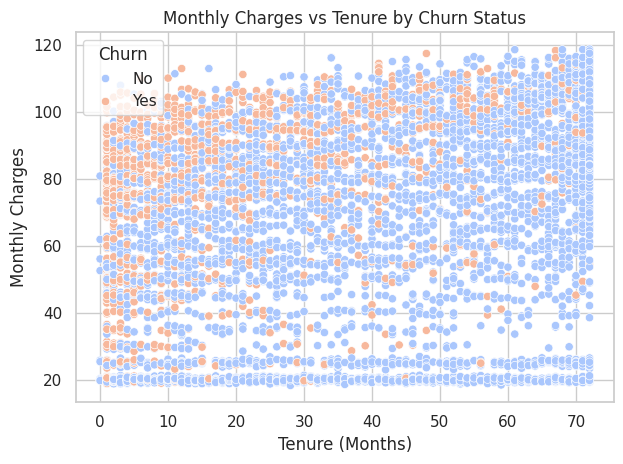

In [ ]:
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm')
plt.title('Monthly Charges vs Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.tight_layout()
